<a href="https://colab.research.google.com/github/vish-shinde/personality_prediction/blob/main/Personality_Prediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading the Data Set

In [3]:
data_raw = pd.read_csv('/content/drive/MyDrive/data-final.csv', sep='\t')
data = data_raw.copy()
pd.options.display.max_columns = 150

data.drop(data.columns[50:107], axis=1, inplace=True)
data.drop(data.columns[50:], axis=1, inplace=True)

print('Number of participants: ', len(data))
data
# print(list(data.columns))

Number of participants:  1015341


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,5.0,4.0,2.0,5.0,2.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,4.0,3.0,5.0,1.0,5.0,5.0,4.0,4.0,4.0,5.0,2.0,4.0,1.0,4.0,3.0,5.0,3.0,3.0,5.0,3.0,3.0,2.0,3.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,3.0,2.0,4.0,3.0,2.0,2.0,4.0,2.0,4.0,1.0,3.0,5.0,5.0,3.0,2.0,3.0,2.0,4.0,3.0,5.0,4.0,5.0,3.0,5.0,1.0,5.0,1.0,4.0,1.0,4.0,5.0,1.0,5.0,1.0,4.0,1.0,5.0,5.0,4.0,5.0
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,4.0,4.0,2.0,2.0,4.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,2.0,4.0,2.0,4.0,4.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0


# Understanding the Data Set

In [4]:
print('Is there any missing value? ', data.isnull().values.any())
print('How many missing values? ', data.isnull().values.sum())
data.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(data))

Is there any missing value?  True
How many missing values?  89150
Number of participants after eliminating missing values:  1013558


#Clustering Participants into 5 Personality Groups

In [5]:
# Creating K-means Cluster Model
from sklearn.cluster import KMeans

prepros_data = data
# Defining 5 clusters to fit the model
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(prepros_data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [6]:
# Predicting the Clusters
pd.options.display.max_columns = 10
predictions = k_fit.labels_
prepros_data['Clusters'] = predictions
prepros_data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.0,1.0,5.0,2.0,5.0,...,5.0,3.0,4.0,5.0,0
1,3.0,5.0,3.0,4.0,3.0,...,4.0,2.0,5.0,3.0,2
2,2.0,3.0,4.0,4.0,3.0,...,5.0,3.0,4.0,4.0,2
3,2.0,2.0,2.0,3.0,4.0,...,4.0,4.0,3.0,3.0,1
4,3.0,3.0,3.0,3.0,5.0,...,5.0,3.0,5.0,5.0,0


#Analysing the Model and Predictions

How many individual do we have for each cluster?

In [7]:
prepros_data.Clusters.value_counts()

3    226905
2    213082
0    209208
4    201222
1    163141
Name: Clusters, dtype: int64

In [8]:
pd.options.display.max_columns = 51
prepros_data.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.481052,1.934434,4.342602,2.210174,4.269923,1.660720,3.895014,2.799683,3.752758,2.504723,2.321618,3.821536,3.152442,3.282972,2.115607,1.901141,2.112849,1.678698,2.118585,1.718835,1.895420,4.432584,1.836431,4.244446,1.858361,3.843529,1.587793,4.095675,4.097458,4.194754,3.712124,2.587004,4.188277,1.902461,3.133819,2.287250,3.865746,1.938803,3.575456,3.873064,3.887189,1.753026,4.084605,1.794114,4.159855,1.653355,4.314888,3.238404,4.094428,4.297565
1,2.190387,3.284368,2.788802,3.401389,2.584476,2.761409,2.119939,3.521414,2.651063,3.784230,2.346363,3.616491,2.989310,2.916502,2.326386,2.018021,2.309003,1.929729,2.589533,2.250329,3.038176,2.920817,2.587578,2.756664,3.161786,2.634684,3.011640,2.838618,2.588221,2.970682,3.136575,2.835670,3.662065,2.416260,2.362901,2.748089,3.371384,2.519992,2.762022,3.334551,3.536052,1.977884,3.614916,2.059225,3.621536,2.043190,3.882427,3.112853,3.693412,3.666509
2,2.127007,3.304423,3.103195,3.658164,2.963113,2.704123,2.210586,4.000070,2.329620,4.129185,3.475854,3.100126,4.135507,2.621268,2.802264,2.760726,2.843624,2.402836,2.947424,2.684858,1.885420,3.939436,1.686205,4.350255,1.987498,4.139458,2.013971,3.982387,4.170690,3.723506,3.834059,2.232924,4.296998,2.014004,3.236369,2.077651,4.159981,2.014351,3.827517,3.889057,3.574746,2.132287,3.891488,2.060728,3.730296,1.965319,4.013094,2.983171,4.262092,3.816371
3,3.444516,1.920420,3.785813,2.512845,4.035521,1.836711,3.645482,2.773588,3.758084,3.009145,3.816016,2.923166,4.246667,2.410802,3.289883,3.472220,3.810247,3.461960,3.660995,3.179203,2.160935,4.269293,2.655622,4.182411,2.003195,3.998837,1.860933,3.895882,4.130486,3.842370,2.957577,3.601723,3.842004,3.236434,2.237478,3.520363,3.461246,2.828651,2.948335,3.479747,3.737326,2.120094,4.246134,1.968317,3.955038,1.773637,3.960402,3.373399,4.189820,4.198453
4,1.806751,3.629489,2.232370,4.056301,2.282986,3.194283,1.741321,4.071270,2.172675,4.476012,4.251603,2.458121,4.505616,2.145282,3.557757,3.859384,3.988351,3.758615,4.005327,3.930584,2.492918,3.334929,2.596078,3.812098,2.579286,3.829114,2.736679,3.413628,3.653159,3.049244,2.814528,3.345275,3.817376,3.467051,2.102255,3.488088,3.567105,3.036184,2.787518,3.313450,3.500353,2.381678,4.061947,2.136913,3.433799,2.086492,3.679727,3.176422,4.278324,3.722341


Let's sum up the each question groups (EXT, EST ..) and see if we can see a pattern.

In [9]:
# Summing up the different questions groups
df_model = prepros_data
col_list = list(df_model)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df_model[ext].sum(axis=1)/10
data_sums['neurotic'] = df_model[est].sum(axis=1)/10
data_sums['agreeable'] = df_model[agr].sum(axis=1)/10
data_sums['conscientious'] = df_model[csn].sum(axis=1)/10
data_sums['open'] = df_model[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,3.085108,2.422428,3.208645,3.106400,3.327743
1,2.908748,2.529167,2.850887,2.914951,3.120800
2,3.052949,2.977449,3.187883,3.158291,3.242959
3,3.072213,3.427116,3.299996,3.211356,3.352262
4,2.966346,3.646064,3.149713,3.173883,3.245800


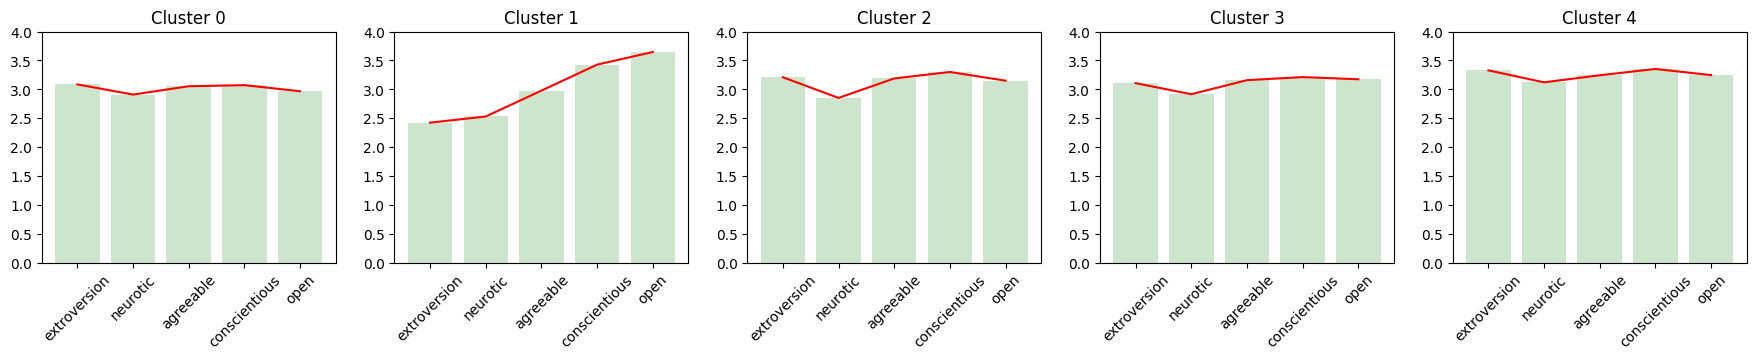

In [10]:
# Visualizing the means for each cluster
dataclusters = data_sums.groupby('clusters').mean()
plt.figure(figsize=(22,3))
for i in range(0, 5): 
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[:, i], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4);

#Implementing the Model to See My Personality

In [11]:
import openpyxl

# Load Excel file and select worksheet
workbook = openpyxl.load_workbook('/content/drive/MyDrive/questions-1.xlsx')
worksheet = workbook.active

# Extract questions from worksheet
questions = []
for row in worksheet.iter_rows(min_row=1, max_col=1):
    question = row[0].value
    if question:
        questions.append(question)

# Write questions and ask for responses
for i, question in enumerate(questions):
    worksheet.cell(row=i+2, column=1, value=question)
    while True:
        response = input(f"{question} (1-5): ")
        if response.isdigit() and int(response) in range(1, 6):
            worksheet.cell(row=i+2, column=2, value=response)
            break
        else:
            print("Invalid input. Please enter a number between 1 and 5.")

# Transpose the data
worksheet_transposed = workbook.create_sheet('Answers')
for row in worksheet.iter_rows():
    for cell in row:
      if cell.row > 1:
          worksheet_transposed.cell(column=cell.row-1, row=cell.column, value=cell.value)

# Remove the original sheet
workbook.remove(worksheet)

# Save workbook
workbook.save('/content/drive/MyDrive/personality_answers.xlsx')


I am the life of the party. (1-5): 1
I dont talk a lot. (1-5): 2
I feel comfortable around people. (1-5): 3
I keep in the background. (1-5): 5
I start conversations. (1-5): 5
I have little to say. (1-5): 5
I talk to a lot of different people at parties. (1-5): 5
I dont like to draw attention to myself. (1-5): 4
I dont mind being the center of attention. (1-5): 3
I am quiet around strangers. (1-5): 5
I get stressed out easily. (1-5): 4
I am relaxed most of the time. (1-5): 1
I worry about things. (1-5): 2
I seldom feel blue. (1-5): 3
I am easily disturbed. (1-5): 4
I get upset easily. (1-5): 5
I change my mood a lot. (1-5): 3
I have frequent mood swings. (1-5): 4
I get irritated easily. (1-5): 1
I often feel blue. (1-5): 2
I feel little concern for others. (1-5): 4
I am interested in people. (1-5): 3
I insult people. (1-5): 3
I sympathize with others feelings. (1-5): 2
I am not interested in other peoples problems. (1-5): 4
I have a soft heart. (1-5): 3
I am not really interested in oth

In [12]:
# Load the Excel file
workbook = openpyxl.load_workbook('/content/drive/MyDrive/personality_answers.xlsx')

# Select the worksheet
worksheet = workbook['Answers']

# Iterate over the cells in the first row and replace their values with new values
new_values = ['EXT1','EXT2','EXT3','EXT4','EXT5','EXT6','EXT7','EXT8','EXT9','EXT10',
              'EST1','EST2','EST3','EST4','EST5','EST6','EST7','EST8','EST9','EST10',
              'AGR1','AGR2','AGR3','AGR4','AGR5','AGR6','AGR7','AGR8','AGR9','AGR10',
              'CSN1','CSN2','CSN3','CSN4','CSN5','CSN6','CSN7','CSN8','CSN9','CSN10',
              'OPN1','OPN2','OPN3','OPN4','OPN5','OPN6','OPN7','OPN8','OPN9','OPN10']

for column in worksheet.iter_cols(min_row=1, max_row=1):
    for cell in column:
        if not cell.value:
            continue
        if cell.column > len(new_values):
            break
        cell.value = new_values[cell.column - 1]
        
# Save the modified Excel file
workbook.save('/content/drive/MyDrive/personality_result.xlsx')

In [13]:
my_data = pd.read_excel('/content/drive/MyDrive/personality_result.xlsx')
my_data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,1,2,3,5,5,5,5,4,3,5,4,1,2,3,4,5,3,4,1,2,4,3,3,2,4,3,2,2,1,5,5,1,1,1,2,2,3,1,5,2,1,4,3,2,5,1,5,2,4,3


In [14]:
my_personality = k_fit.predict(my_data)
print('My Personality Cluster: ', my_personality)

My Personality Cluster:  [1]


In [15]:
# Summing up the my question groups
col_list = list(my_data)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

my_sums = pd.DataFrame()
my_sums['extroversion'] = my_data[ext].sum(axis=1)/10
my_sums['neurotic'] = my_data[est].sum(axis=1)/10
my_sums['agreeable'] = my_data[agr].sum(axis=1)/10
my_sums['conscientious'] = my_data[csn].sum(axis=1)/10
my_sums['open'] = my_data[opn].sum(axis=1)/10
my_sums['cluster'] = my_personality
print('Sum of my question groups')
my_sums

Sum of my question groups


,extroversion,neurotic,agreeable,conscientious,open,cluster
0,3.8,2.9,2.9,2.3,3.0,1


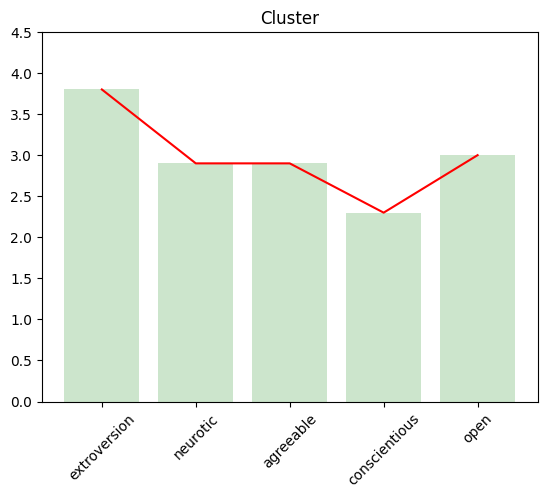

In [18]:
my_sum = my_sums.drop('cluster', axis=1)
plt.bar(my_sum.columns, my_sum.iloc[0,:], color='green', alpha=0.2)
plt.plot(my_sum.columns, my_sum.iloc[0,:], color='red')
plt.title('Cluster')
plt.xticks(rotation=45)
plt.ylim(0,4.5);